# Expansion of the Universe (movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
12 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
class movie:
    def __init__(self, alist):
        self.fig = plt.figure(figsize=(4, 4), facecolor='white')
        self.ax = self.fig.add_subplot(1,1,1, projection='3d')

        # Set timestepping
        self.alist = alist
        self.astart = alist[0]
        self.steps = len(alist)
        
        # Set the mesh size
        size = self.size = 3
        
        # Generate lattice points
        self.x, self.y, self.z = np.tile(np.arange(size),size*size), np.tile(np.repeat(np.arange(size),size),size),\
        np.repeat(np.arange(size),size*size)
        self.mx, self.my, self.mz = np.meshgrid(range(size), range(size), range(size))

    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        a = self.astart
        ax = self.ax
        size = self.size
        
        # Scale lattice points
        x=a*self.x+(1-a)
        y=a*self.y+(1-a)
        z=a*self.z+(1-a)
        mx=a*self.mx+(1-a)
        my=a*self.my+(1-a)
        mz=a*self.mz+(1-a)
        
        # Plot lattice points
        self.plot, = ax.plot(x, y, z, linestyle="", color='black', marker="o")
        
        # Plot the cubes
        self.lines_x, self.lines_y, self.lines_z = {}, {}, {}
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x[i,j,k], = ax.plot([mx[i,j,k], mx[i+1,j,k]], [my[i,j,k], my[i+1,j,k]], [mz[i,j,k], mz[i+1,j,k]], color='black')
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y[i,j,k], = ax.plot([mx[i,j,k], mx[i,j+1,k]], [my[i,j,k], my[i,j+1,k]], [mz[i,j,k], mz[i,j+1,k]], color='black')
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z[i,j,k], = ax.plot([mx[i,j,k], mx[i,j,k+1]], [my[i,j,k], my[i,j,k+1]], [mz[i,j,k], mz[i,j,k+1]], color='black')
    
        # Remove axis labels
        ax.set_axis_off()
    
        # Set plot limits
        ax.set_xlim([0, size-1])
        ax.set_ylim([0, size-1])
        ax.set_zlim([0, size-1])
    
        # Set aspect equal
        ax.set_box_aspect([1, 1, 1])
    
        # Set projection angle
        ax.view_init(elev=20, azim=35)  # Set the elevation and azimuth angles

        return self.plot, self.lines_x, self.lines_y, self.lines_z, 
    
    # Update function
    def update(self, i):
        a = self.alist[i]
        ax = self.ax
        size = self.size
        
        # Scale lattice points
        x=a*self.x+(1-a)
        y=a*self.y+(1-a)
        z=a*self.z+(1-a)
        mx=a*self.mx+(1-a)
        my=a*self.my+(1-a)
        mz=a*self.mz+(1-a)

        # Plot lattice points
        self.plot.set_data(x,y)
        self.plot.set_3d_properties(z)

        # Plot the cubes
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x[i,j,k].set_data([mx[i,j,k], mx[i+1,j,k]], [my[i,j,k], my[i+1,j,k]])
                    self.lines_x[i,j,k].set_3d_properties([mz[i,j,k], mz[i+1,j,k]])
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y[i,j,k].set_data([mx[i,j,k], mx[i,j+1,k]], [my[i,j,k], my[i,j+1,k]])
                    self.lines_y[i,j,k].set_3d_properties([mz[i,j,k], mz[i,j+1,k]])
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z[i,j,k].set_data([mx[i,j,k], mx[i,j,k+1]], [my[i,j,k], my[i,j,k+1]])
                    self.lines_z[i,j,k].set_3d_properties([mz[i,j,k], mz[i,j,k+1]])
                    
        return self.plot, self.lines_x, self.lines_y, self.lines_z, 
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=self.steps, init_func=self.init, blit=False)
        return animation

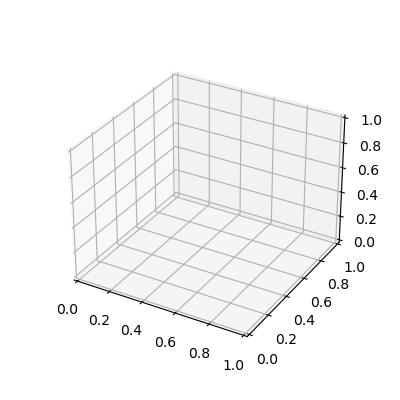

In [3]:
this_movie = movie(np.concatenate([np.linspace(0.2, 1., 48*4), np.linspace(1., 0.2, 48*4)]))
animation = this_movie.animate()

In [4]:
animation.save("output/Expansion.mp4", dpi=300, fps=48)